In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import math
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import RobustScaler
%matplotlib inline

# Uploading Dataset

In [2]:
# Load the data from desktop
insurance = pd.read_csv('C:/Users/Admin/Desktop/insurance/Assignment ADMN5016_Dataset.csv')

In [3]:
#Number of rows and Column
insurance.shape

(1338, 7)

In [4]:
#First 5 rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Datatype and count of values for each dimension
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Measures of central value and quartiles for each each dimension
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#checking number of null values
insurance.isnull().sum() #No null values present

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Graphical Representation

Text(0, 0.5, 'Charges in $')

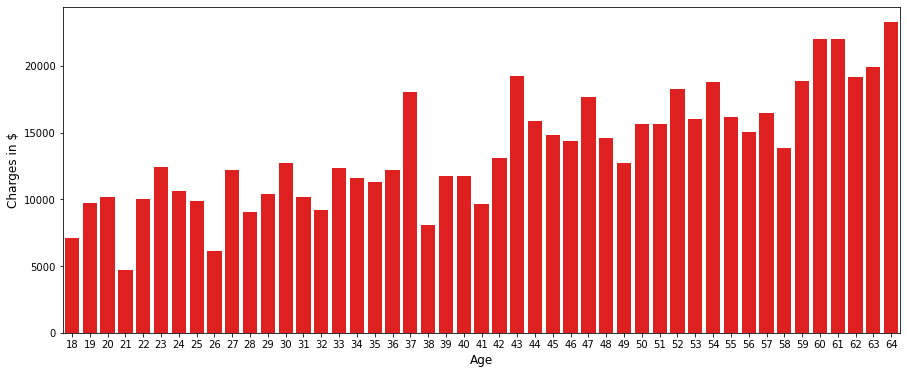

In [8]:
#intiating barplot for age and claim charges
fig = plt.figure(figsize = (15, 6))
sns.barplot(y = 'charges', x = 'age', data = insurance, ci = None, color = 'red')
plt.xlabel("Age", size=12)
plt.ylabel("Charges in $", size=12)

Text(0, 0.5, 'Charges in $')

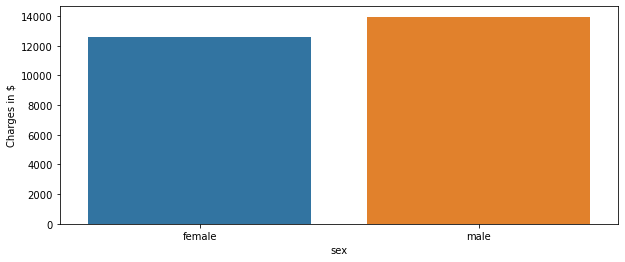

In [9]:
#intiating barplot for sex and claim charges
fig = plt.figure(figsize = (10, 4))
sns.barplot(y = 'charges',  x = 'sex', data = insurance, ci = None)
plt.xlabel("sex", size=10)
plt.ylabel("Charges in $", size=10)

In [10]:
#Judging range for BMI dimension
min(insurance.bmi), max(insurance.bmi)
(15.96, 53.13)

(15.96, 53.13)

In [11]:
#Classifying BMI into classes
insurance["bmiclass"] = insurance.bmi
insurance.bmiclass = insurance.bmi.round()
insurance.head(5)
insurance['bmiclass'] = insurance['bmiclass'].replace([16, 17, 18, 19, 20, 21], 1)
insurance['bmiclass'] = insurance['bmiclass'].replace([22, 23, 24, 25, 26, 27], 2)
insurance['bmiclass'] = insurance['bmiclass'].replace([28, 29, 30, 31, 32, 33], 3)
insurance['bmiclass'] = insurance['bmiclass'].replace([34, 35, 36, 37, 38, 39], 4)
insurance['bmiclass'] = insurance['bmiclass'].replace([40, 41, 42, 43, 44, 45], 5)
insurance['bmiclass'] = insurance['bmiclass'].replace([46, 47, 48, 49, 50, 51, 52, 53], 6)
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,3.0
1,18,male,33.770,1,no,southeast,1725.55230,4.0
2,28,male,33.000,3,no,southeast,4449.46200,3.0
3,33,male,22.705,0,no,northwest,21984.47061,2.0
4,32,male,28.880,0,no,northwest,3866.85520,3.0


Text(0, 0.5, 'Claim Charges ($)')

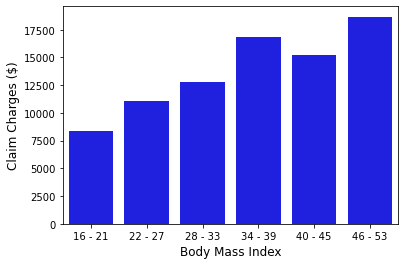

In [12]:
#Initialting barplot for BMIClass and Charges
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', x = 'bmiclass', data = insurance, ci = None, color = 'blue')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["16 - 21", "22 - 27", "28 - 33", "34 - 39", "40 - 45", "46 - 53"]) 
# set labels

plt.xlabel("Body Mass Index", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

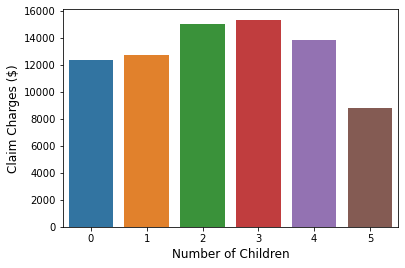

In [13]:
#intiating barplot for children and claim charges
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', x = 'children', data = insurance,ci = None)
plt.xlabel("Number of Children", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

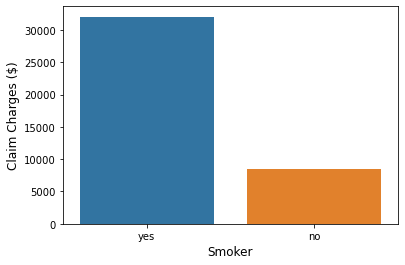

In [14]:
#intiating barplot for smoker and claim charges
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', x = 'smoker', data = insurance, ci = None)
plt.xlabel("Smoker", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

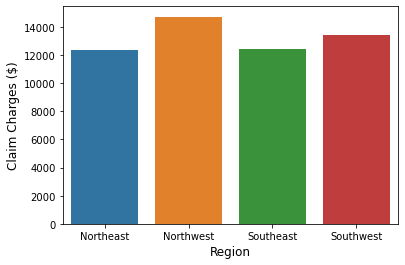

In [15]:
#intiating barplot for Region and claim charges
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', x = 'region', data = insurance, ci = None)
plt.xticks(ticks=[0, 1, 2, 3], labels = ["Northeast", "Northwest", "Southeast", "Southwest"]) 
plt.xlabel("Region", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [16]:
#Judging range for charges dimension
m = min(insurance.charges)
n = max(insurance.charges)
m, n

(1121.8739, 63770.42801)

<AxesSubplot:xlabel='charges', ylabel='Count'>

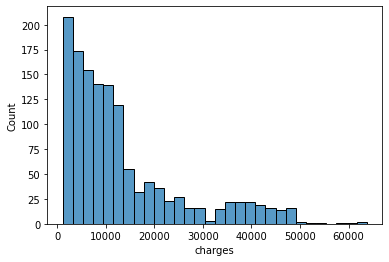

In [17]:
#Imitiating histogram for charges
plt.figure(figsize=(6, 4))
sns.histplot(insurance['charges'])

#Histogram is skewed

In [18]:
#Using min and max scaling in sklearn to normalize the charges
column = 'charges'
insurance[column] = (insurance[column] - insurance[column].min()) / (insurance[column].max() - insurance[column].min())
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,0.251611,3.0
1,18,male,33.770,1,no,southeast,0.009636,4.0
2,28,male,33.000,3,no,southeast,0.053115,3.0
3,33,male,22.705,0,no,northwest,0.333010,2.0
4,32,male,28.880,0,no,northwest,0.043816,3.0


# Selection of Significant Feature

In [19]:
#Converting categorical data into numerical data using one hot encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
insurance["sex"] = le.fit_transform(insurance["sex"])       # 0 = female, 1 = male
insurance["smoker"] = le.fit_transform(insurance["smoker"]) # 1 = smoker, 2 = non-smoker
insurance["region"] = le.fit_transform(insurance["region"]) # 1 = northwest, 2 = southeast, 3 = southwest, 4 = northeast

<AxesSubplot:>

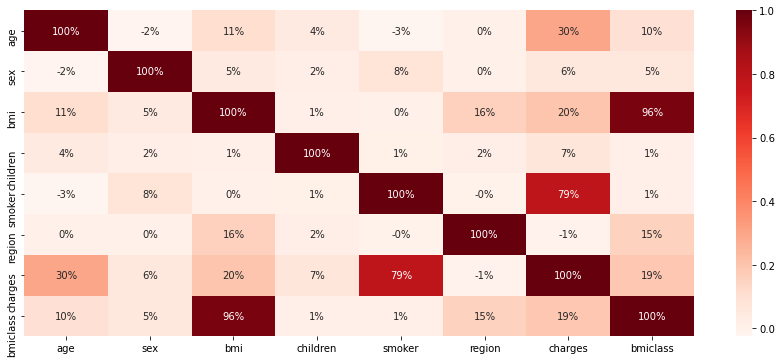

In [20]:
plt.figure(figsize=(15,6))  
sns.heatmap(insurance.corr(), annot=True, fmt='.0%', cmap='Reds')

In [21]:
#Since sex and reagion dimension/columns are categorical in nature, we wont be able to put in much of use for it so we will be dropping these column
insurance.drop(['sex', 'region', 'bmiclass'], axis=1, inplace=True)

In [22]:
x_data = insurance.drop('charges', axis = 1)
y_data = insurance['charges']

In [23]:
# Spliting data into train and test data

In [24]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)

In [25]:
sc = StandardScaler()
x_training_data = pd.DataFrame(sc.fit_transform(x_training_data),columns=x_data.columns)
x_test_data = pd.DataFrame(sc.fit_transform(x_test_data),columns=x_data.columns)

# Model 1: Linear Regression Model

In [26]:
#Linear Regression
# Create model object. 
model_lr = LinearRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [27]:
r2_lr = r2_score(y_test_data, predictions_lr)
print("R2 score :", r2_lr)

R2 score : 0.7656830523004188


In [28]:
rmse = np.sqrt(np.mean(((predictions_lr - y_test_data)**2)))
print(rmse)

0.0949123371964687


In [29]:
#RMSE shows that linear regression model has a typical prediction error of .09, which is good.

# Model 2:Random Forest Model

In [30]:
# Create model object. 
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [31]:
# Calculate the R2 score.
r2_rf = r2_score(y_test_data, predictions_rf)
print("R2 Score :", r2_rf)

R2 Score : 0.8230230541174343


In [32]:
rmse = np.sqrt(np.mean(((predictions_rf - y_test_data)**2)))
print(rmse)

0.08248579515212681


In [33]:
#The RMSE shows that the random forest model has a typical prediction error of .08, which is very good.

# Accuracy scores

In [35]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest'],
    'Accuracy_score' :[r2_lr, r2_rf]
})


,Model,Accuracy_score
1,Random Forrest,0.823023
0,Linear Regression,0.765683


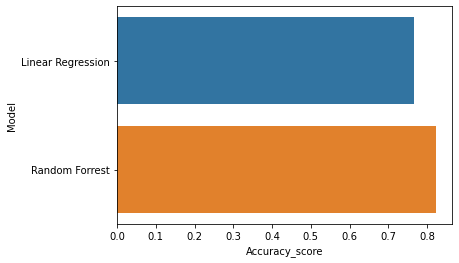

In [36]:
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [37]:
#Since Randome forrest regressor has the highest accuracy rate we will be trying to optimize the model through gridsearch

In [38]:
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(x_training_data, y_training_data)

## show end time
print(datetime.now())

2022-12-07 11:57:35.461399
2022-12-07 12:00:11.451560


# Re-running Random Forrest Regressor

In [39]:
# Make predictions on the test data. 
predictions_rf = CV_rfr.predict(x_test_data)

In [40]:
r2 = r2_score(y_test_data, predictions_rf)
print("R2 Score :", r2)

R2 Score : 0.8654377300171289


In [41]:
rmse = np.sqrt(np.mean(((predictions_rf - y_test_data)**2)))
print(rmse)

0.07192543044082186


,Model,Accuracy_score
1,Random Forrest,0.865438
0,Linear Regression,0.765683


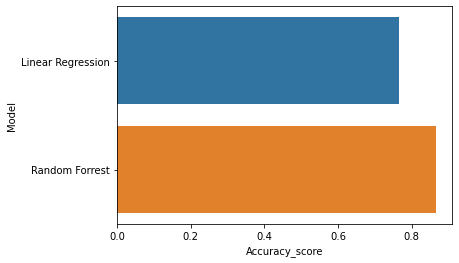

In [42]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest'],
    'Accuracy_score' :[r2_lr, r2]
})
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [43]:
# a better R2 score indicates the model has improved after running Gridsearch

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


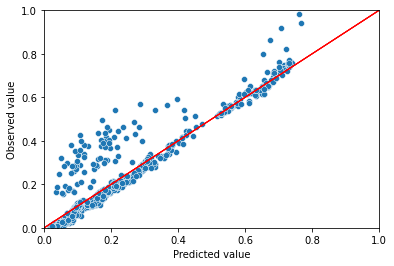

In [54]:
Y_max = x_training_data.max()
Y_min = y_training_data.min()

#ax = sns.scatterplot(mod1_res.fittedvalues, Y)
ax = sns.scatterplot(CV_rfr.predict(x_training_data), y_training_data)
ax.set_xlabel("Predicted value")
ax.set_ylabel("Observed value")
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

X_ref = Y_ref = np.linspace(Y_min, Y_max, 50)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [45]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int32  
 4   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 47.2 KB


In [46]:
x_test = [[19,27.9,0,1]]

In [47]:
xdf = pd.DataFrame(x_test,columns = x_test_data.columns)
xdf

,age,bmi,children,smoker
0,19,27.9,0,1


In [48]:
CV_rfr.predict(xdf) * (n-m) + m

array([46745.77469253])